# **LIBRARY**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# **FAKE NEWS**

In [5]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [8]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

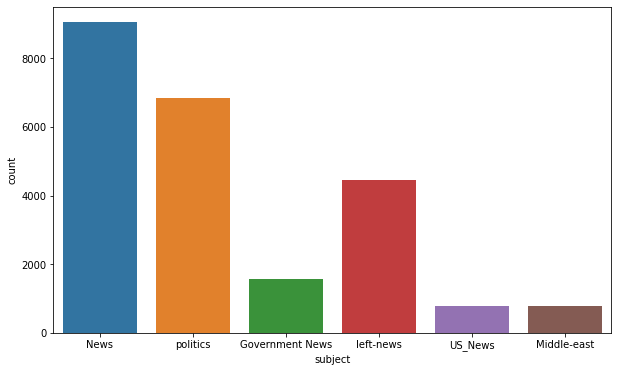

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject', data=fake)

# **WORDCLOUD**

In [10]:
text = ' '.join(fake['text'].tolist())

In [11]:
' '.join(['this', 'is', 'a', 'data'])

'this is a data'

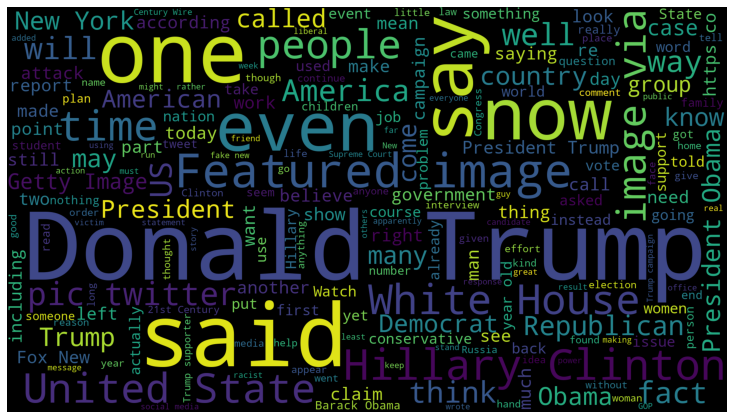

In [12]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **REAL NEWS**

In [13]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [14]:
text = ' '.join(real['text'].tolist())

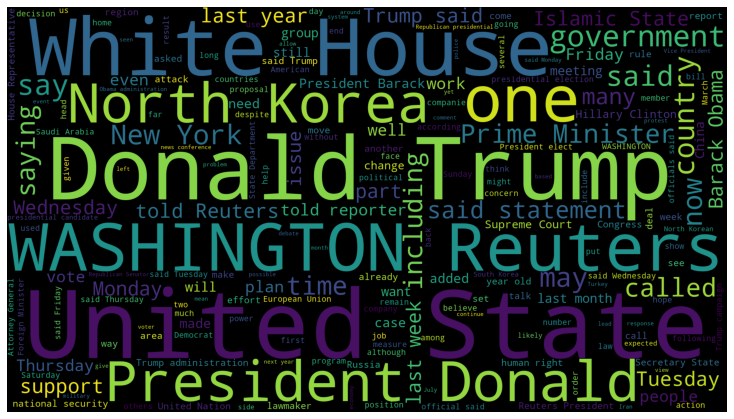

In [15]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **CLEANING DATA**



In [16]:
real.sample(5)

,title,text,subject,date
5233,"Trump, China's top diplomat, discuss cooperati...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"February 27, 2017"
5446,"Factbox: Trump controversies: Michael Flynn, t...",(Reuters) - National security adviser Michael ...,politicsNews,"February 14, 2017"
9737,Jenner uses women's restroom at Trump property,Caitlyn Jenner posted a video on Wednesday (Ap...,politicsNews,"April 28, 2016"
5415,"Meeting Israel's Netanyahu, Trump backs away f...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"February 15, 2017"
13430,"Trump, South Korea's Moon discuss next steps o...",WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"November 30, 2017"


In [17]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [18]:
unknown_publishers ##length of indices

[7,
 8,
 12,
 13,
 14,
 17,
 27,
 40,
 67,
 70,
 97,
 122,
 140,
 155,
 156,
 192,
 222,
 233,
 252,
 257,
 284,
 308,
 321,
 362,
 384,
 412,
 453,
 459,
 495,
 531,
 838,
 851,
 1076,
 1081,
 1112,
 1146,
 1179,
 1341,
 1381,
 1451,
 1509,
 1522,
 1523,
 1539,
 1570,
 1611,
 1645,
 1657,
 1659,
 1696,
 1711,
 1726,
 1730,
 1748,
 1768,
 1824,
 1826,
 1878,
 1885,
 1932,
 1952,
 1967,
 2012,
 2023,
 2056,
 2087,
 2100,
 2102,
 2120,
 2140,
 2171,
 2187,
 2247,
 2262,
 2275,
 2313,
 2315,
 2355,
 2383,
 2392,
 2442,
 2486,
 2510,
 2518,
 2557,
 2602,
 2658,
 2776,
 2811,
 2855,
 2885,
 2922,
 3107,
 3248,
 3270,
 3466,
 3488,
 3597,
 3615,
 3782,
 3835,
 3930,
 3944,
 3976,
 4170,
 4198,
 4206,
 4307,
 4358,
 4465,
 4554,
 4753,
 5246,
 5290,
 5316,
 5379,
 5380,
 5412,
 5504,
 5538,
 5588,
 5593,
 5633,
 5761,
 5784,
 5794,
 5796,
 5823,
 5866,
 5997,
 6026,
 6065,
 6075,
 6524,
 6573,
 6660,
 6823,
 7259,
 7353,
 7463,
 7568,
 7715,
 7766,
 7816,
 7890,
 7915,
 7922,
 8118,
 8127,
 8

In [19]:
len(unknown_publishers) ##no of publishers

222

In [20]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [21]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [22]:
real = real.drop(8970, axis=0)

In [23]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip()) 

In [24]:
real['publisher']=publisher
real['text'] = tmp_text

In [25]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [26]:
real.shape

(21416, 5)

In [27]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()=="" ]

In [28]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [29]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [30]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# **PREPROCESSING TEXT**

In [31]:
real['class'] = 1
fake['class'] = 0

In [32]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [33]:
real = real[['text', 'class']]

In [34]:
fake = fake[['text', 'class']]

In [35]:
data = real.append(fake, ignore_index=True)

In [36]:
data.sample(5)

,text,class
34573,this woman is a hero: trump surrogate leads fa...,0
15298,new delhi declares emergency as toxic smog thi...,1
7120,u.s. holocaust museum alarmed over 'hateful sp...,1
28626,watch what hillary says about trump’s bigoted...,0
29962,‘making a murderer’ prosecutor ken kratz find...,0


In [37]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     |████████████████████████████████| 10.4 MB 4.5 MB/s 
     |████████████████████████████████| 2.2 MB 39.3 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 5.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-kb9zd4wb
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip

In [38]:
import preprocess_kgptalkie as ps

In [39]:
data['text'].apply(lambda x: ps.remove_special_chars(x))

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
44892    mcpain john mccain furious that iran treated u...
44893    justice yahoo settles email privacy classactio...
44894    sunnistan us and allied safe zone plan to take...
44895    how to blow 700 million al jazeera america fin...
44896    10 us navy sailors held by iranian military si...
Name: text, Length: 44897, dtype: object

In [40]:
data.head()

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


# **VECTORIZATION**

In [41]:
import gensim

In [42]:
y = data['class'].values

In [43]:
X = [d.split() for d in data['text'].tolist()]

In [44]:
type(X)

list

In [45]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [46]:
len(w2v_model.wv.vocab)

375373

In [47]:
w2v_model.wv['love']

array([-0.67035496,  2.8987122 , -2.0873048 , -1.3786054 , -1.5233179 ,
        0.4784193 ,  0.306567  ,  0.92424476,  2.9525697 , -0.10007001,
        1.8865677 ,  1.5406682 , -2.5555995 ,  0.11875148,  1.9140737 ,
        0.09947296,  3.7642405 , -1.0233301 , -1.7006457 ,  2.8184814 ,
        0.98274153, -1.0716877 , -3.7212465 ,  1.8587179 , -1.7898496 ,
       -1.0484991 ,  0.8754487 ,  0.9647494 , -2.1986806 , -0.41090444,
        3.633595  , -5.1504974 ,  2.9859695 ,  0.22775051,  0.9935005 ,
       -1.0843964 ,  5.6154323 ,  1.1607891 , -0.36714515,  0.21770614,
        2.2035995 ,  0.52530813, -1.8672721 , -2.4500718 ,  0.58501065,
        2.9968915 ,  0.66930395,  0.7918194 ,  1.1120808 , -3.3475995 ,
       -1.9359763 , -3.8518    , -1.9900408 ,  1.060002  , -3.1391232 ,
       -3.4281428 ,  1.4583371 ,  3.0387893 , -2.0639675 ,  1.4804776 ,
       -1.2176667 , -5.5470476 , -0.7725329 , -0.5403692 , -0.6109505 ,
       -2.9333508 ,  1.391768  ,  1.0688709 , -2.2202303 ,  3.42

In [48]:
w2v_model.wv.most_similar('trump')

[('trump,', 0.8081886172294617),
 ('trump’s', 0.7427472472190857),
 ('trump.', 0.699941873550415),
 ('trump.it', 0.5733188390731812),
 ('trump?', 0.568985641002655),
 ('trump.the', 0.5307708978652954),
 ('he', 0.5219517946243286),
 ('rumsfeld', 0.5195783376693726),
 ('him.trump', 0.5189984440803528),
 ('cruz', 0.5035734176635742)]

In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [50]:
X = tokenizer.texts_to_sequences(X)

In [51]:
#tokenizer.word_index

In [52]:
[len(x) for x in X]

[756,
 630,
 464,
 382,
 860,
 602,
 543,
 145,
 108,
 74,
 404,
 625,
 110,
 201,
 361,
 450,
 697,
 188,
 394,
 218,
 527,
 911,
 415,
 364,
 694,
 375,
 352,
 281,
 75,
 436,
 177,
 229,
 95,
 337,
 1120,
 840,
 554,
 469,
 466,
 99,
 188,
 324,
 582,
 72,
 410,
 365,
 619,
 358,
 85,
 403,
 81,
 962,
 658,
 418,
 399,
 384,
 220,
 162,
 389,
 616,
 489,
 246,
 853,
 370,
 628,
 649,
 1306,
 431,
 398,
 142,
 224,
 1110,
 75,
 74,
 591,
 853,
 760,
 792,
 347,
 694,
 482,
 418,
 84,
 419,
 127,
 1386,
 100,
 458,
 358,
 85,
 62,
 108,
 656,
 350,
 228,
 80,
 322,
 443,
 349,
 562,
 415,
 855,
 92,
 333,
 136,
 198,
 409,
 91,
 1126,
 997,
 387,
 115,
 73,
 438,
 600,
 88,
 80,
 638,
 252,
 254,
 313,
 202,
 171,
 292,
 392,
 428,
 401,
 720,
 618,
 282,
 104,
 87,
 85,
 79,
 74,
 512,
 407,
 249,
 725,
 769,
 246,
 420,
 436,
 545,
 422,
 365,
 312,
 831,
 687,
 89,
 99,
 108,
 360,
 87,
 58,
 295,
 226,
 285,
 370,
 108,
 462,
 580,
 943,
 1071,
 263,
 462,
 464,
 499,
 89,
 537,
 

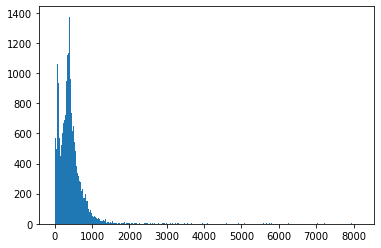

In [53]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [54]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1603

In [55]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [56]:
len(X[2])

1000

In [57]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [58]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  
  return weight_matrix

  

In [59]:
embedding_vectors = get_weight_matrix(w2v_model)

In [60]:
embedding_vectors.shape

(375374, 100)

# **MODEL TRAINING**

In [64]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 100)         37537400  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 37,654,777
Trainable params: 117,377
Non-trainable params: 37,537,400
_________________________________________________________________


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [67]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 129s 166ms/step - loss: 0.1278 - acc: 0.9551 - val_loss: 0.0869 - val_acc: 0.9724
Epoch 2/6
737/737 [==============================] - 122s 166ms/step - loss: 0.0591 - acc: 0.9804 - val_loss: 0.0299 - val_acc: 0.9903
Epoch 3/6
737/737 [==============================] - 123s 167ms/step - loss: 0.0236 - acc: 0.9921 - val_loss: 0.0266 - val_acc: 0.9911
Epoch 4/6
737/737 [==============================] - 123s 167ms/step - loss: 0.0117 - acc: 0.9961 - val_loss: 0.0216 - val_acc: 0.9937
Epoch 5/6
737/737 [==============================] - 122s 166ms/step - loss: 0.0245 - acc: 0.9922 - val_loss: 0.0347 - val_acc: 0.9881
Epoch 6/6
737/737 [==============================] - 122s 165ms/step - loss: 0.0183 - acc: 0.9936 - val_loss: 0.0203 - val_acc: 0.9948


In [68]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

# **ACCURACY**

In [69]:
accuracy_score(y_test, y_pred)

0.9934966592427616

# **CLASSIFICATION REPORT**

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5789
           1       0.99      0.99      0.99      5436

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

